In [86]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [92]:
test_df = pd.read_csv('/home/ynmao/causalml/total_df_test.csv')

In [88]:
print(test_df)

      Unnamed: 0  Unnamed: 0.1  temperature  wind_speed  intensity  \
0              0     -1.722443    -0.729325    0.627431   1.130518   
1              1     -1.722428    -0.226872    0.300312  -0.292907   
2              2     -1.722414     0.061707    0.496033  -0.230178   
3              3     -1.722399     0.801878   -0.622555   1.378098   
4              4     -1.722384    -2.068603   -0.229721  -0.292907   
...          ...           ...          ...         ...        ...   
5175        5175      1.733514    -0.631064    0.598762  -0.292907   
5176        5176      1.733528    -0.631064    0.598762  -0.292907   
5177        5177      1.733543    -0.631064    0.598762  -0.292907   
5178        5178      1.733558    -0.631064    0.598762  -0.292907   
5179        5179      1.733573    -0.631064    0.598762  -0.292907   

      rain_hour_cnt      pm25    shujia    hanjia  temperature_low  ...  \
0          3.870447  1.357111 -0.492420 -0.275296        -0.313450  ...   
1        

In [5]:
print(test_df['stat_date'][6:20])

6     2022-01-07
7     2022-01-08
8     2022-01-09
9     2022-01-10
10    2022-01-11
11    2022-01-12
12    2022-01-13
13    2022-01-14
14    2022-01-01
15    2022-01-02
16    2022-01-03
17    2022-01-04
18    2022-01-05
19    2022-01-06
Name: stat_date, dtype: object


In [9]:
print(test_df['subsidy_c_rate'])

0      -0.008879
1      -0.008878
2      -0.008879
3      -0.008878
4      -0.008878
          ...   
5175   -0.008879
5176   -0.008878
5177   -0.008879
5178   -0.008879
5179   -0.008879
Name: subsidy_c_rate, Length: 5180, dtype: float64


(array([5166.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          14.]),
 array([-8.87918567e-03,  2.59595639e+01,  5.19280070e+01,  7.78964501e+01,
         1.03864893e+02,  1.29833336e+02,  1.55801779e+02,  1.81770222e+02,
         2.07738666e+02,  2.33707109e+02,  2.59675552e+02]),
 <BarContainer object of 10 artists>)

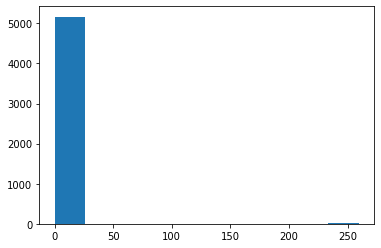

In [8]:
plt.hist(x=test_df['subsidy_c_rate'])

In [10]:
print(test_df['subsidy_c_rate'].min())
print(test_df['subsidy_c_rate'].max())

-0.0088791856704469
259.6755517370397


In [11]:
test_df = test_df[test_df['subsidy_c_rate'] < 26]

(array([5.16e+03, 0.00e+00, 2.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00]),
 array([-0.00887919,  0.19587661,  0.40063241,  0.60538821,  0.81014401,
         1.01489981,  1.21965561,  1.42441141,  1.62916721,  1.83392301,
         2.03867881]),
 <BarContainer object of 10 artists>)

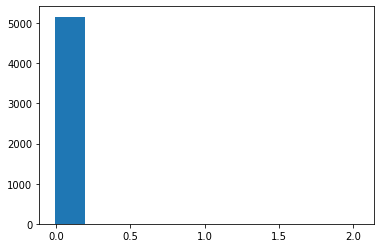

In [12]:
plt.hist(x=test_df['subsidy_c_rate'])

In [13]:
test_df = test_df[test_df['subsidy_c_rate'] < 0.2]

(array([5.154e+03, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-0.00887919, -0.00397368,  0.00093183,  0.00583733,  0.01074284,
         0.01564834,  0.02055385,  0.02545935,  0.03036486,  0.03527036,
         0.04017587]),
 <BarContainer object of 10 artists>)

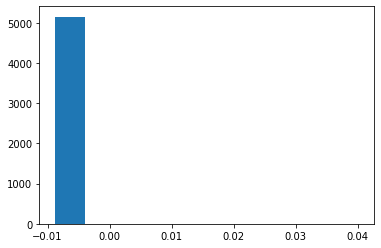

In [14]:
plt.hist(x=test_df['subsidy_c_rate'])

In [15]:
test_df = test_df[test_df['subsidy_c_rate'] < -0.004]

(array([5.152e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-0.00887919, -0.00871567, -0.00855215, -0.00838864, -0.00822512,
        -0.0080616 , -0.00789808, -0.00773457, -0.00757105, -0.00740753,
        -0.00724402]),
 <BarContainer object of 10 artists>)

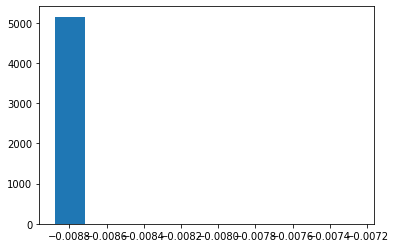

In [16]:
plt.hist(x=test_df['subsidy_c_rate'])

In [17]:
test_df = test_df[test_df['subsidy_c_rate'] < -0.00871567]

(array([1012., 1706., 1538.,  656.,  170.,   52.,    6.,    0.,    2.,
          10.]),
 array([-0.00887919, -0.00887861, -0.00887804, -0.00887747, -0.00887689,
        -0.00887632, -0.00887574, -0.00887517, -0.0088746 , -0.00887402,
        -0.00887345]),
 <BarContainer object of 10 artists>)

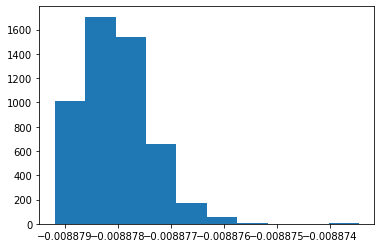

In [18]:
plt.hist(x=test_df['subsidy_c_rate'])

In [19]:
print(test_df['subsidy_c_rate'][1000:1100])

1016   -0.008878
1017   -0.008879
1018   -0.008879
1019   -0.008879
1020   -0.008879
          ...   
1111   -0.008878
1112   -0.008877
1113   -0.008878
1114   -0.008877
1115   -0.008878
Name: subsidy_c_rate, Length: 100, dtype: float64


In [20]:
print(test_df['city_id'][1000:1100])

1016    73
1017    73
1018    73
1019    73
1020    73
        ..
1111    80
1112    80
1113    80
1114    80
1115    80
Name: city_id, Length: 100, dtype: int64


In [24]:
print(test_df.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'temperature', 'wind_speed', 'intensity',
       'rain_hour_cnt', 'pm25', 'shujia', 'hanjia', 'temperature_low',
       ...
       'stage_k_5', 'stage_k_6', 'stage_k_7', 'total_no_call_order_cnt',
       'online_time', 'total_finish_order_cnt', 'total_gmv',
       'total_no_call_order_cnt_future_1', 'city_id', 'stat_date'],
      dtype='object', length=141)


In [63]:
pre_columns = test_df.columns.values.tolist()[:-1]
print(pre_columns)
print(test_df.columns.values.tolist())

['Unnamed: 0', 'Unnamed: 0.1', 'temperature', 'wind_speed', 'intensity', 'rain_hour_cnt', 'pm25', 'shujia', 'hanjia', 'temperature_low', 'temperature_high', 'temperature_square', 'quarter_weather_intense1', 'quarter_weather_intense2', 'quarter_weather_intense3', 'quarter_weather_intense4', 'quarter_weather_intense5', 'quarter_weather_intense6', 'quarter_weather_intense7', 'quarter_weather_intense8', 'subsidy_b_rate', 'subsidy_c_rate', 'subsidy_b_rate_log', 'subsidy_c_rate_log', 'per_subsidy_b', 'per_subsidy_c', 'per_subsidy_b_square', 'per_subsidy_c_square', 'per_subsidy_b_sqrt', 'per_subsidy_c_sqrt', 'logistic_b', 'logistic_c', 'sum_bc', 'per_order_price', 'calls_online_time_ratio', 'is_weekend_0', 'is_weekend_1', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday', 'rain_hour_cnt_weekday', 'pm25_weekday', 'intensity_weekday', 'temperature_weekday', 'temperature_square_weekday', 'wind_speed_weekday', 'temperature_low_weekday', 'temperat

In [93]:
cnt = 0
row_old = 0
for index, row in test_df.iterrows():
    #print(row['subsidy_c_rate'])
    if row['subsidy_c_rate'] > -0.008877:
        print('index', index)
        print(row['subsidy_c_rate'])
        print(row_old['subsidy_c_rate'])
        print(test_df.iloc[index]['subsidy_c_rate'])
        test_df.loc[index, pre_columns] = row_old[pre_columns]
        print(test_df.iloc[index]['subsidy_c_rate'])
        cnt += 1
    row_old = test_df.iloc[index]
    #if row_old['subsidy_c_rate'] > -0.008877:
    #    break
print('cnt', cnt)
        

index 15
-0.0088769953390265
-0.0088772757786478
-0.0088769953390265
-0.0088772757786478
index 16
-0.0088768203204307
-0.0088772757786478
-0.0088768203204307
-0.0088772757786478
index 22
-0.0088769953390265
-0.0088772757786478
-0.0088769953390265
-0.0088772757786478
index 23
-0.0088768203204307
-0.0088772757786478
-0.0088768203204307
-0.0088772757786478
index 29
-0.0088769646080939
-0.0088775958633077
-0.0088769646080939
-0.0088775958633077
index 36
-0.0088769646080939
-0.0088775958633077
-0.0088769646080939
-0.0088775958633077
index 56
-0.0088765242994232
-0.0088778650893378
-0.0088765242994232
-0.0088778650893378
index 61
-0.0088769803980512
-0.0088778957097487
-0.0088769803980512
-0.0088778957097487
index 63
-0.0088765242994232
-0.0088782536926182
-0.0088765242994232
-0.0088782536926182
index 68
-0.0088769803980512
-0.0088778957097487
-0.0088769803980512
-0.0088778957097487
index 70
-0.0088756048031589
-0.0088782536926182
-0.0088756048031589
-0.0088782536926182
index 71
-0.008876884

-0.0088786886705233
index 424
259.6755517370397
-0.0088786886705233
259.6755517370397
-0.0088786886705233
index 425
259.6755517370397
-0.0088786886705233
259.6755517370397
-0.0088786886705233
index 426
259.6755517370397
-0.0088786886705233
259.6755517370397
-0.0088786886705233
index 427
259.6755517370397
-0.0088786886705233
259.6755517370397
-0.0088786886705233
index 428
259.6755517370397
-0.0088786886705233
259.6755517370397
-0.0088786886705233
index 429
259.6755517370397
-0.0088786886705233
259.6755517370397
-0.0088786886705233
index 430
259.6755517370397
-0.0088786886705233
259.6755517370397
-0.0088786886705233
index 431
259.6755517370397
-0.0088786886705233
259.6755517370397
-0.0088786886705233
index 432
259.6755517370397
-0.0088786886705233
259.6755517370397
-0.0088786886705233
index 433
259.6755517370397
-0.0088786886705233
259.6755517370397
-0.0088786886705233
index 435
-0.0088764741688245
-0.0088770180622272
-0.0088764741688245
-0.0088770180622272
index 437
-0.0088766050958361


-0.0088773426621496
index 1744
-0.0088758195893834
-0.0088772235585978
-0.0088758195893834
-0.0088772235585978
index 1747
-0.0088767354787449
-0.0088773426621496
-0.0088767354787449
-0.0088773426621496
index 1770
-0.0088769824149576
-0.0088775315713013
-0.0088769824149576
-0.0088775315713013
index 1777
-0.0088769824149576
-0.0088775315713013
-0.0088769824149576
-0.0088775315713013
index 1782
-0.0088759662647125
-0.008877971323251
-0.0088759662647125
-0.008877971323251
index 1789
-0.0088759662647125
-0.008877971323251
-0.0088759662647125
-0.008877971323251
index 1792
-0.0088766912546973
-0.0088780553232413
-0.0088766912546973
-0.0088780553232413
index 1795
-0.0088764235059535
-0.0088777902818892
-0.0088764235059535
-0.0088777902818892
index 1799
-0.0088766912546973
-0.0088774129201567
-0.0088766912546973
-0.0088774129201567
index 1802
-0.0088764235059535
-0.0088777902818892
-0.0088764235059535
-0.0088777902818892
index 1848
-0.0088768505764299
-0.008877596544881
-0.0088768505764299
-0.0

-0.0088772924546915
index 3962
-0.0088769754060224
-0.0088770191454966
-0.0088769754060224
-0.0088770191454966
index 3969
-0.0088769754060224
-0.0088773485980826
-0.0088769754060224
-0.0088773485980826
index 4032
-0.0088767451570934
-0.0088787281229651
-0.0088767451570934
-0.0088787281229651
index 4037
-0.0088767884803648
-0.0088777016702331
-0.0088767884803648
-0.0088777016702331
index 4039
-0.0088767451570934
-0.0088779039654253
-0.0088767451570934
-0.0088779039654253
index 4044
-0.0088767884803648
-0.0088777016702331
-0.0088767884803648
-0.0088777016702331
index 4051
0.0074724993554004
-0.0088784830605674
0.0074724993554004
-0.0088784830605674
index 4058
0.0074724993554004
-0.0088784830605674
0.0074724993554004
-0.0088784830605674
index 4116
-0.0088769254311304
-0.0088775452124256
-0.0088769254311304
-0.0088775452124256
index 4123
-0.0088769254311304
-0.0088783733421924
-0.0088769254311304
-0.0088783733421924
index 4214
-0.0088764855182537
-0.0088771074014449
-0.0088764855182537
-0.

(array([499., 254., 462., 682., 718., 752., 666., 468., 384., 295.]),
 array([-0.00887919, -0.00887897, -0.00887875, -0.00887853, -0.00887831,
        -0.00887809, -0.00887788, -0.00887766, -0.00887744, -0.00887722,
        -0.008877  ]),
 <BarContainer object of 10 artists>)

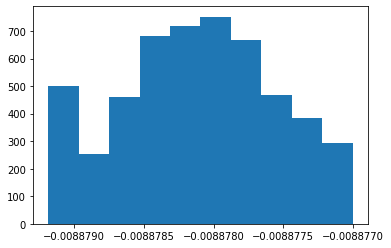

In [94]:
plt.hist(x=test_df['subsidy_c_rate'])

In [96]:
print(test_df['stat_date'][1134:1154])

1134    2022-01-01
1135    2022-01-02
1136    2022-01-03
1137    2022-01-04
1138    2022-01-05
1139    2022-01-06
1140    2022-01-07
1141    2022-01-08
1142    2022-01-09
1143    2022-01-10
1144    2022-01-11
1145    2022-01-12
1146    2022-01-13
1147    2022-01-14
1148    2022-01-01
1149    2022-01-02
1150    2022-01-03
1151    2022-01-04
1152    2022-01-05
1153    2022-01-06
Name: stat_date, dtype: object


In [98]:
test_df.to_csv('/home/ynmao/causalml/total_df_test_new.csv')

In [99]:
new_test_df = pd.read_csv('/home/ynmao/causalml/total_df_test_new.csv')

(array([499., 254., 462., 682., 718., 752., 666., 468., 384., 295.]),
 array([-0.00887919, -0.00887897, -0.00887875, -0.00887853, -0.00887831,
        -0.00887809, -0.00887788, -0.00887766, -0.00887744, -0.00887722,
        -0.008877  ]),
 <BarContainer object of 10 artists>)

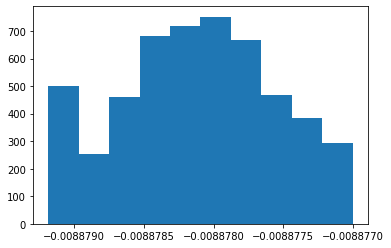

In [100]:
plt.hist(x=new_test_df['subsidy_c_rate'])

In [101]:
train_df = pd.read_csv('/home/ynmao/causalml/total_df_train.csv')

In [102]:
print(train_df['stat_date'].min())
print(train_df['stat_date'].max())

2020-01-03
2021-10-08


In [103]:
val_df = pd.read_csv('/home/ynmao/causalml/total_df_val.csv')

In [104]:
print(val_df['stat_date'].min())
print(val_df['stat_date'].max())

2021-10-09
2021-12-31


In [105]:
print(new_test_df['stat_date'].min())
print(new_test_df['stat_date'].max())

2022-01-01
2022-01-14


In [106]:
print(len(new_test_df))

5180


In [107]:
new_all_df = pd.concat([train_df, val_df, new_test_df])

In [108]:
print(len(new_all_df))

232295


In [110]:
print(len(train_df))
print(len(train_df.columns.values.tolist()))
print(len(val_df))
print(len(val_df.columns.values.tolist()))
print(len(new_test_df))
print(len(new_test_df.columns.values.tolist()))

198274
141
28841
141
5180
142


In [111]:
print(new_test_df.columns.values.tolist())

['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'temperature', 'wind_speed', 'intensity', 'rain_hour_cnt', 'pm25', 'shujia', 'hanjia', 'temperature_low', 'temperature_high', 'temperature_square', 'quarter_weather_intense1', 'quarter_weather_intense2', 'quarter_weather_intense3', 'quarter_weather_intense4', 'quarter_weather_intense5', 'quarter_weather_intense6', 'quarter_weather_intense7', 'quarter_weather_intense8', 'subsidy_b_rate', 'subsidy_c_rate', 'subsidy_b_rate_log', 'subsidy_c_rate_log', 'per_subsidy_b', 'per_subsidy_c', 'per_subsidy_b_square', 'per_subsidy_c_square', 'per_subsidy_b_sqrt', 'per_subsidy_c_sqrt', 'logistic_b', 'logistic_c', 'sum_bc', 'per_order_price', 'calls_online_time_ratio', 'is_weekend_0', 'is_weekend_1', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday', 'rain_hour_cnt_weekday', 'pm25_weekday', 'intensity_weekday', 'temperature_weekday', 'temperature_square_weekday', 'wind_speed_weekday', 'temperature_low_w

In [114]:
new_test_df = new_test_df.drop(['Unnamed: 0.1.1'], axis=1, inplace=False)

In [115]:
print(len(new_test_df.columns.values.tolist()))

141


In [117]:
new_test_df.to_csv('/home/ynmao/causalml/total_df_test_new.csv')

In [118]:
new_test_df = pd.read_csv('/home/ynmao/causalml/total_df_test_new.csv')

In [119]:
print(len(new_test_df.columns.values.tolist()))

142


In [120]:
print(new_test_df.columns.values.tolist())

['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'temperature', 'wind_speed', 'intensity', 'rain_hour_cnt', 'pm25', 'shujia', 'hanjia', 'temperature_low', 'temperature_high', 'temperature_square', 'quarter_weather_intense1', 'quarter_weather_intense2', 'quarter_weather_intense3', 'quarter_weather_intense4', 'quarter_weather_intense5', 'quarter_weather_intense6', 'quarter_weather_intense7', 'quarter_weather_intense8', 'subsidy_b_rate', 'subsidy_c_rate', 'subsidy_b_rate_log', 'subsidy_c_rate_log', 'per_subsidy_b', 'per_subsidy_c', 'per_subsidy_b_square', 'per_subsidy_c_square', 'per_subsidy_b_sqrt', 'per_subsidy_c_sqrt', 'logistic_b', 'logistic_c', 'sum_bc', 'per_order_price', 'calls_online_time_ratio', 'is_weekend_0', 'is_weekend_1', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday', 'rain_hour_cnt_weekday', 'pm25_weekday', 'intensity_weekday', 'temperature_weekday', 'temperature_square_weekday', 'wind_speed_weekday', 'temperature_low_w

In [121]:
new_test_df = new_test_df.drop(['Unnamed: 0.1.1'], axis=1, inplace=False)

In [122]:
print(len(train_df))
print(len(train_df.columns.values.tolist()))
print(len(val_df))
print(len(val_df.columns.values.tolist()))
print(len(new_test_df))
print(len(new_test_df.columns.values.tolist()))

198274
141
28841
141
5180
141


In [123]:
new_all_df = pd.concat([train_df, val_df, new_test_df])

In [124]:
print(len(new_all_df))

232295


In [125]:
new_all_df.to_csv('/home/ynmao/causalml/total_df_all_new.csv')

In [126]:
new_all_df = pd.read_csv('/home/ynmao/causalml/total_df_all_new.csv')
print(len(new_test_df))
print(len(new_test_df.columns.values.tolist()))

5180
141


In [127]:
print(len(new_all_df))
print(len(new_all_df.columns.values.tolist()))

232295
142


In [128]:
new_test_df.to_csv('/home/ynmao/causalml/total_df_test_new.csv')

(array([499., 254., 462., 682., 718., 752., 666., 468., 384., 295.]),
 array([-0.00887919, -0.00887897, -0.00887875, -0.00887853, -0.00887831,
        -0.00887809, -0.00887788, -0.00887766, -0.00887744, -0.00887722,
        -0.008877  ]),
 <BarContainer object of 10 artists>)

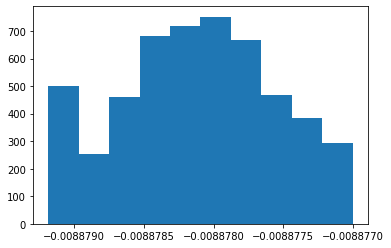

In [129]:
plt.hist(x=new_test_df['subsidy_c_rate'])